In [1]:
%pylab inline
import pandas as pd
import numpy as np
from collections import Counter
from copy import copy

Populating the interactive namespace from numpy and matplotlib


In [2]:
import matplotlib.pyplot as plt
from string import ascii_lowercase
from string import ascii_uppercase
import itertools
import random

In [3]:
def Marimonio(women_list, man_list, women_df, man_df ):
  # dict to control which women each man can make proposals
  women_available = {man:women_list for man in man_list}
  # waiting list of men that were able to create pair on each iteration
  waiting_list = []
  # dict to store created pairs
  proposals = {}
  # variable to count number of iterations
  count = 0
  # while not all men have pairs
  while len(waiting_list)<len(man_list):
      # man makes proposals
      for man in man_list:
          if man not in waiting_list:
              # each man make proposal to the top women from it's list
              women = women_available[man]
              best_choice = man_df.loc[man][man_df.loc[man].index.isin(women)].idxmin()
              proposals[(man, best_choice)]=(man_df.loc[man][best_choice],
                                                  women_df.loc[man][best_choice])
      # if women have more than one proposals 
      # she will choose the best option
      overlays = Counter([key[1] for key in proposals.keys()])
      # cycle to choose the best options
      for women in overlays.keys():
          if overlays[women]>1:
              # pairs to drop from proposals
              pairs_to_drop = sorted({pair: proposals[pair] for pair in proposals.keys() 
                      if women in pair}.items(), 
                    key=lambda x: x[1][1]
                    )[1:]
              # if man was rejected by woman
              # there is no pint for him to make proposal 
              # second time to the same woman
              for p_to_drop in pairs_to_drop:
                  del proposals[p_to_drop[0]]
                  _women = copy(women_available[p_to_drop[0][0]])
                  _women.remove(p_to_drop[0][1])
                  women_available[p_to_drop[0][0]] = _women
      # man who successfully created pairs must be added to the waiting list 
      waiting_list = [man[0] for man in proposals.keys()]
      # update counter
      count+=1
  print("Días necesarios: ",count)
  print("Parejas: ", proposals)

# Gale–Shapley algorithm simply explained n = 4

### Best Case

Define men and women data frames

In [4]:
man_list = ['a', 'b', 'c', 'd']
women_list = ['A', 'B', 'C', 'D']

In [5]:
women_df = pd.DataFrame({'A': [1,2,3,4], 'B': [2,3,4,1], 'C':[3,4,1,2], 'D':[4,1,2,3]})
women_df.index = man_list

In [6]:
man_df = pd.DataFrame({'A': [1,2,3,4], 'B': [2,3,4,1], 'C':[3,4,1,2], 'D':[4,1,2,3]})
man_df.index = man_list

In [7]:
women_df

,A,B,C,D
a,1,2,3,4
b,2,3,4,1
c,3,4,1,2
d,4,1,2,3


In [8]:
man_df

,A,B,C,D
a,1,2,3,4
b,2,3,4,1
c,3,4,1,2
d,4,1,2,3


Gale-Shapley algorithm

In [9]:
Marimonio(women_list, man_list, women_df, man_df )

Días necesarios:  1
Parejas:  {('a', 'A'): (1, 1), ('b', 'D'): (1, 1), ('c', 'C'): (1, 1), ('d', 'B'): (1, 1)}


### Worst Case

Define men and women data frames

In [10]:
man_list = ['a', 'b', 'c', 'd']
women_list = ['A', 'B', 'C', 'D']

In [11]:
women_df = pd.DataFrame({'A': [4,1,2,3], 'B': [3,4,1,2], 'C':[2,3,4,1], 'D':[1,2,3,4]})
women_df.index = man_list

In [12]:
man_df = pd.DataFrame({'A': [1,3,2,1], 'B': [2,1,3,2], 'C':[3,2,1,3], 'D':[4,4,4,4]})
man_df.index = man_list

In [13]:
women_df

,A,B,C,D
a,4,3,2,1
b,1,4,3,2
c,2,1,4,3
d,3,2,1,4


In [14]:
man_df

,A,B,C,D
a,1,2,3,4
b,3,1,2,4
c,2,3,1,4
d,1,2,3,4


Gale-Shapley algorithm

In [15]:
Marimonio(women_list, man_list, women_df, man_df )

Días necesarios:  10
Parejas:  {('b', 'A'): (3, 1), ('c', 'B'): (3, 1), ('d', 'C'): (3, 1), ('a', 'D'): (4, 1)}


# Gale–Shapley algorithm simply explained n = 40

### Best Case

In [16]:
def BestCase(n):
  a = list(range(1,n+1))
  b = []
  b.append(a)
  for i in range(n-1):
    a = a[-1:] + a[:-1]
    b.append(a)
  return b

Define men and women data frames

In [17]:
man_list = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'aa', 'ab', 'ac', 'ad', 'ae', 'af', 'ag', 'ah', 'ai', 'aj', 'ak', 'al', 'am', 'an']
women_list = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'AA', 'AB', 'AC', 'AD', 'AE', 'AF', 'AG', 'AH', 'AI', 'AJ', 'AK', 'AL', 'AM', 'AN']

In [18]:
man_df = pd.DataFrame(BestCase(40), index = man_list, columns = women_list)

In [19]:
women_df = pd.DataFrame(BestCase(40), index = man_list, columns = women_list)

In [20]:
man_df

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z,AA,AB,AC,AD,AE,AF,AG,AH,AI,AJ,AK,AL,AM,AN
a,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
b,40,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
c,39,40,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
d,38,39,40,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
e,37,38,39,40,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
f,36,37,38,39,40,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
g,35,36,37,38,39,40,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
h,34,35,36,37,38,39,40,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
i,33,34,35,36,37,38,39,40,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
j,32,33,34,35,36,37,38,39,40,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31


In [21]:
women_df

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z,AA,AB,AC,AD,AE,AF,AG,AH,AI,AJ,AK,AL,AM,AN
a,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
b,40,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39
c,39,40,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38
d,38,39,40,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
e,37,38,39,40,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36
f,36,37,38,39,40,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
g,35,36,37,38,39,40,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
h,34,35,36,37,38,39,40,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33
i,33,34,35,36,37,38,39,40,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32
j,32,33,34,35,36,37,38,39,40,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31


Gale-Shapley algorithm

In [22]:
Marimonio(women_list, man_list, women_df, man_df )

Días necesarios:  1
Parejas:  {('a', 'A'): (1, 1), ('b', 'B'): (1, 1), ('c', 'C'): (1, 1), ('d', 'D'): (1, 1), ('e', 'E'): (1, 1), ('f', 'F'): (1, 1), ('g', 'G'): (1, 1), ('h', 'H'): (1, 1), ('i', 'I'): (1, 1), ('j', 'J'): (1, 1), ('k', 'K'): (1, 1), ('l', 'L'): (1, 1), ('m', 'M'): (1, 1), ('n', 'N'): (1, 1), ('o', 'O'): (1, 1), ('p', 'P'): (1, 1), ('q', 'Q'): (1, 1), ('r', 'R'): (1, 1), ('s', 'S'): (1, 1), ('t', 'T'): (1, 1), ('u', 'U'): (1, 1), ('v', 'V'): (1, 1), ('w', 'W'): (1, 1), ('x', 'X'): (1, 1), ('y', 'Y'): (1, 1), ('z', 'Z'): (1, 1), ('aa', 'AA'): (1, 1), ('ab', 'AB'): (1, 1), ('ac', 'AC'): (1, 1), ('ad', 'AD'): (1, 1), ('ae', 'AE'): (1, 1), ('af', 'AF'): (1, 1), ('ag', 'AG'): (1, 1), ('ah', 'AH'): (1, 1), ('ai', 'AI'): (1, 1), ('aj', 'AJ'): (1, 1), ('ak', 'AK'): (1, 1), ('al', 'AL'): (1, 1), ('am', 'AM'): (1, 1), ('an', 'AN'): (1, 1)}


### Worst Case

Define men and women data frames

In [23]:
def WorstCaseMan(n): 
  a = list(range(1,n+1))
  b = []
  b.append(a)
  for i in range(n-1):
    a = a[-2:-1] + a[:-2] + a[-1:]
    b.append(a)
  return b
def WorstCaseWoman(n): 
  a = list(range(n,0,-1))
  a[0] = n
  b = []
  b.append(a)
  for i in range(n-1):
    a = a[-1:] + a[:-1]
    b.append(a)
  return b

In [24]:
man_list = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'aa', 'ab', 'ac', 'ad', 'ae', 'af', 'ag', 'ah', 'ai', 'aj', 'ak', 'al', 'am', 'an']
women_list = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'AA', 'AB', 'AC', 'AD', 'AE', 'AF', 'AG', 'AH', 'AI', 'AJ', 'AK', 'AL', 'AM', 'AN']

In [25]:
man_df = pd.DataFrame(WorstCaseMan(40), index = man_list, columns = women_list)

In [26]:
women_df = pd.DataFrame(WorstCaseWoman(40), index = man_list, columns = women_list)

In [27]:
women_df

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z,AA,AB,AC,AD,AE,AF,AG,AH,AI,AJ,AK,AL,AM,AN
a,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2,1
b,1,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3,2
c,2,1,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4,3
d,3,2,1,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5,4
e,4,3,2,1,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6,5
f,5,4,3,2,1,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7,6
g,6,5,4,3,2,1,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8,7
h,7,6,5,4,3,2,1,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9,8
i,8,7,6,5,4,3,2,1,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10,9
j,9,8,7,6,5,4,3,2,1,40,39,38,37,36,35,34,33,32,31,30,29,28,27,26,25,24,23,22,21,20,19,18,17,16,15,14,13,12,11,10


In [28]:
man_df

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,Y,Z,AA,AB,AC,AD,AE,AF,AG,AH,AI,AJ,AK,AL,AM,AN
a,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40
b,39,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,40
c,38,39,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,40
d,37,38,39,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,40
e,36,37,38,39,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,40
f,35,36,37,38,39,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,40
g,34,35,36,37,38,39,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,40
h,33,34,35,36,37,38,39,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,40
i,32,33,34,35,36,37,38,39,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,40
j,31,32,33,34,35,36,37,38,39,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,40


Gale-Shapley algorithm

In [29]:
Marimonio(women_list, man_list, women_df, man_df )

Días necesarios:  1522
Parejas:  {('b', 'A'): (39, 1), ('c', 'B'): (39, 1), ('d', 'C'): (39, 1), ('e', 'D'): (39, 1), ('f', 'E'): (39, 1), ('g', 'F'): (39, 1), ('h', 'G'): (39, 1), ('i', 'H'): (39, 1), ('j', 'I'): (39, 1), ('k', 'J'): (39, 1), ('l', 'K'): (39, 1), ('m', 'L'): (39, 1), ('n', 'M'): (39, 1), ('o', 'N'): (39, 1), ('p', 'O'): (39, 1), ('q', 'P'): (39, 1), ('r', 'Q'): (39, 1), ('s', 'R'): (39, 1), ('t', 'S'): (39, 1), ('u', 'T'): (39, 1), ('v', 'U'): (39, 1), ('w', 'V'): (39, 1), ('x', 'W'): (39, 1), ('y', 'X'): (39, 1), ('z', 'Y'): (39, 1), ('aa', 'Z'): (39, 1), ('ab', 'AA'): (39, 1), ('ac', 'AB'): (39, 1), ('ad', 'AC'): (39, 1), ('ae', 'AD'): (39, 1), ('af', 'AE'): (39, 1), ('ag', 'AF'): (39, 1), ('ah', 'AG'): (39, 1), ('ai', 'AH'): (39, 1), ('aj', 'AI'): (39, 1), ('ak', 'AJ'): (39, 1), ('al', 'AK'): (39, 1), ('am', 'AL'): (39, 1), ('an', 'AM'): (39, 1), ('a', 'AN'): (40, 1)}


# Random

In [30]:
def MatrimoniosRandom(n, women_list, man_list):
    counter = []
    for i in range(1,101):
        MatchWoman=[random.sample(list(range(1,n+1)),n) for i in range(n)]
        MatchMan=[random.sample(list(range(1,n+1)),n) for i in range(n)]
        women_df = pd.DataFrame(MatchWoman, index = man_list, columns = women_list)
        man_df = pd.DataFrame(MatchMan, index = man_list, columns = women_list)
        # dict to control which women each man can make proposals
        women_available = {man:women_list for man in man_list}
        # waiting list of men that were able to create pair on each iteration
        waiting_list = []
        # dict to store created pairs
        proposals = {}
        # variable to count number of iterations
        count = 0
        # while not all men have pairs
        while len(waiting_list)<len(man_list):
            # man makes proposals
            for man in man_list:
                if man not in waiting_list:
                    # each man make proposal to the top women from it's list
                    women = women_available[man]
                    best_choice = man_df.loc[man][man_df.loc[man].index.isin(women)].idxmin()
                    proposals[(man, best_choice)]=(man_df.loc[man][best_choice],
                                                        women_df.loc[man][best_choice])
            # if women have more than one proposals 
            # she will choose the best option
            overlays = Counter([key[1] for key in proposals.keys()])
            # cycle to choose the best options
            for women in overlays.keys():
                if overlays[women]>1:            
                    # pairs to drop from proposals
                    pairs_to_drop = sorted({pair: proposals[pair] for pair in proposals.keys() 
                            if women in pair}.items(), 
                        key=lambda x: x[1][1]
                        )[1:]
                    # if man was rejected by woman
                    # there is no pint for him to make proposal 
                    # second time to the same woman
                    for p_to_drop in pairs_to_drop:
                        del proposals[p_to_drop[0]]
                        _women = copy(women_available[p_to_drop[0][0]])
                        _women.remove(p_to_drop[0][1])
                        women_available[p_to_drop[0][0]] = _women
            # man who successfully created pairs must be added to the waiting list 
            waiting_list = [man[0] for man in proposals.keys()]
            # update counter}
            count+=1
        counter.append(count)
    print(len(counter))

    #Histograma
    plt.hist(counter, bins=max(counter)-min(counter))
    plt.xlabel('Days')
    plt.ylabel('Frecuency')
    plt.title("Days for the perfect match")
    plt.show()
    print("Max days: ",max(counter))
    print("Min days: ",min(counter))
    print("Average days: ",sum(counter)/len(counter))

## P = 4

In [31]:
man_list = ['a', 'b', 'c', 'd']
women_list = ['A', 'B', 'C', 'D']

100


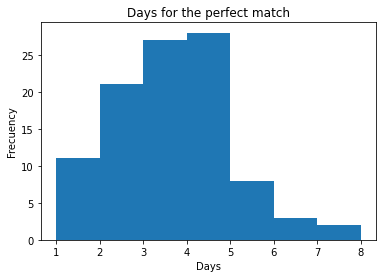

Max days:  8
Min days:  1
Average days:  3.2


In [32]:
MatrimoniosRandom(4, women_list, man_list)

## P = 40

In [33]:
man_list = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'aa', 'ab', 'ac', 'ad', 'ae', 'af', 'ag', 'ah', 'ai', 'aj', 'ak', 'al', 'am', 'an']
women_list = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'AA', 'AB', 'AC', 'AD', 'AE', 'AF', 'AG', 'AH', 'AI', 'AJ', 'AK', 'AL', 'AM', 'AN']

100


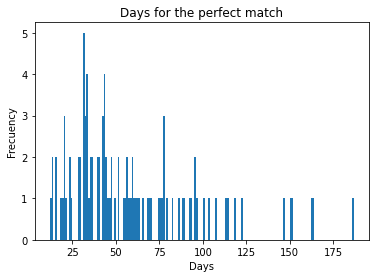

Max days:  187
Min days:  12
Average days:  58.68


In [34]:
MatrimoniosRandom(40, women_list, man_list)